In [4]:
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [5]:
import pandas as pd

df = pd.read_csv('processed_data.csv')
print(df.shape)
print(df.head())

(10000, 12)
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0   1.0             0.268293                 0.303030                0.302297   
1   0.5             0.280488                 0.318182                0.145672   
2   0.5             0.268293                 0.287879                0.244247   
3   0.5             0.280488                 0.303030                0.173054   
4   0.5             0.280488                 0.318182                0.145672   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0     0.566161         0.000000                0    0    0    0    0    0  
1     0.642082         0.013514                0    0    0    0    0    0  
2     0.709328         0.022523                0    0    0    0    0    0  
3     0.494577         0.031532                0    0    0    0    0    0  
4     0.505423         0.040541                0    0    0    0    0    0  


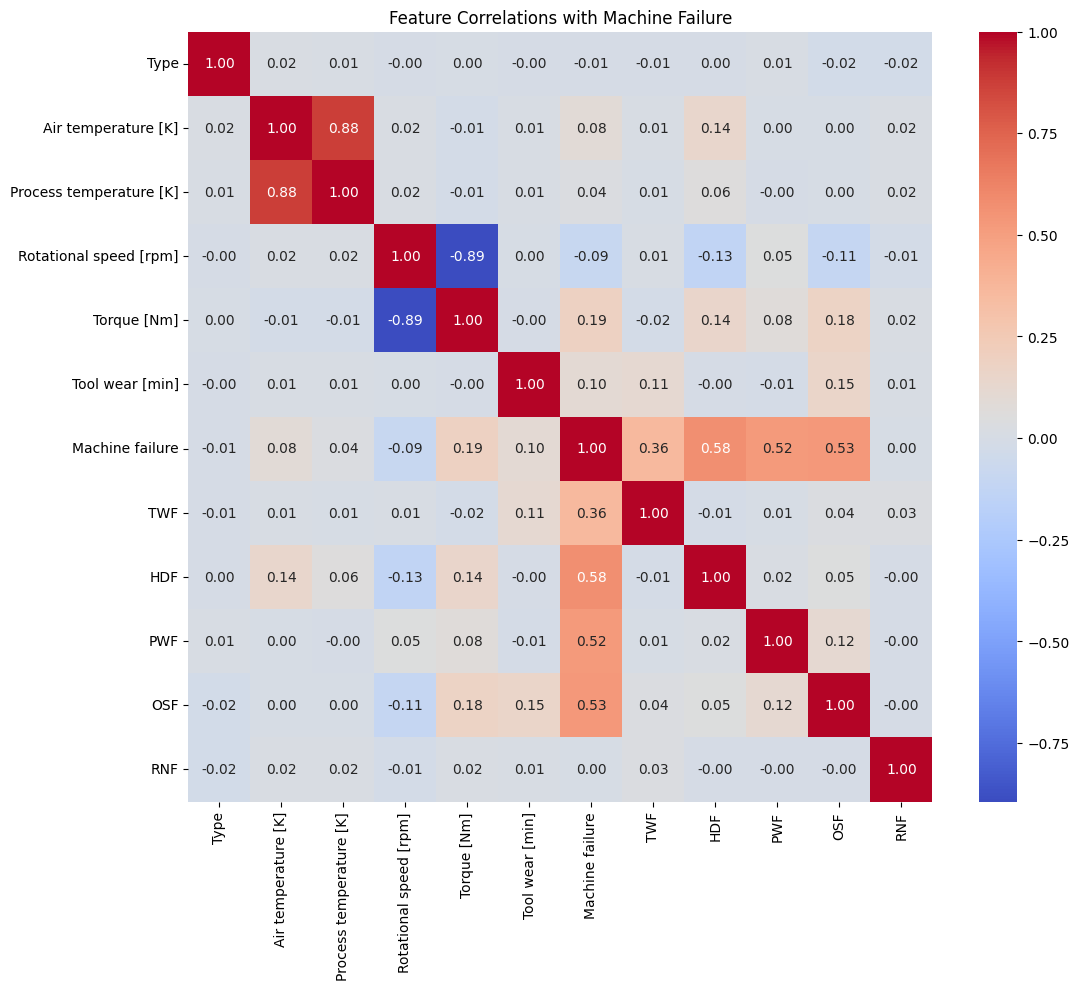

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations with Machine Failure')
plt.savefig('docs/correlation_heatmap.png')
plt.show()

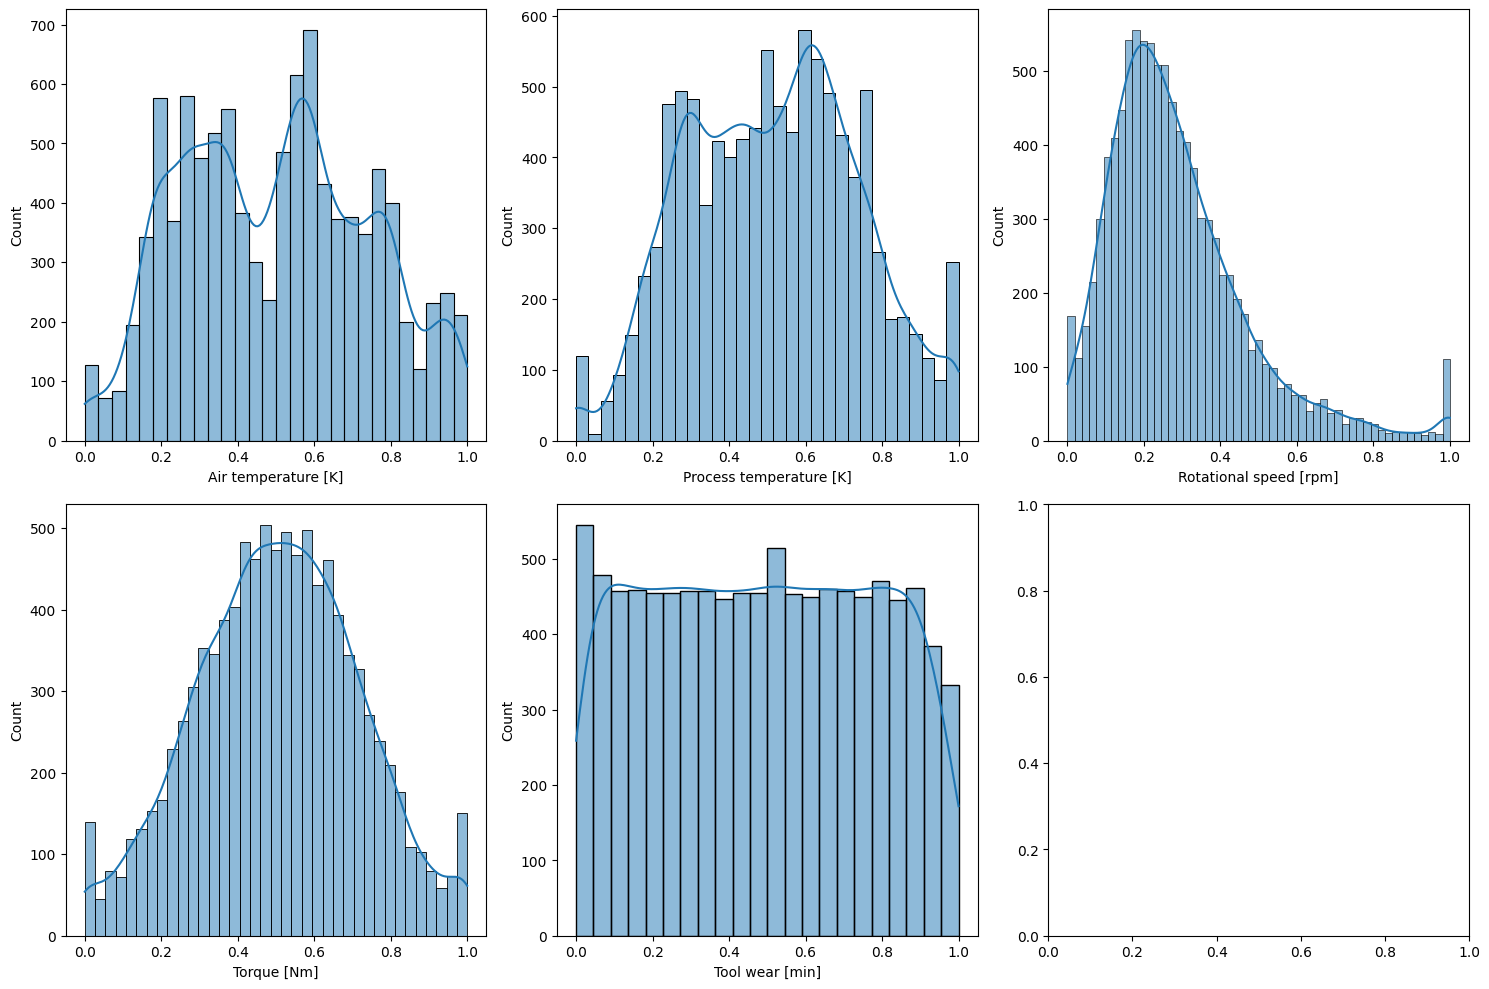

In [32]:
# Histograms for the key features
fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(df['Air temperature [K]'], kde=True, ax=axes[0,0])
sns.histplot(df['Process temperature [K]'], kde=True, ax=axes[0,1])
sns.histplot(df['Rotational speed [rpm]'], kde=True, ax=axes[0,2])
sns.histplot(df['Torque [Nm]'], kde=True, ax=axes[1,0])
sns.histplot(df['Tool wear [min]'], kde=True, ax=axes[1,1])
plt.tight_layout()
plt.savefig('docs/feature_distributions.png')
plt.show()

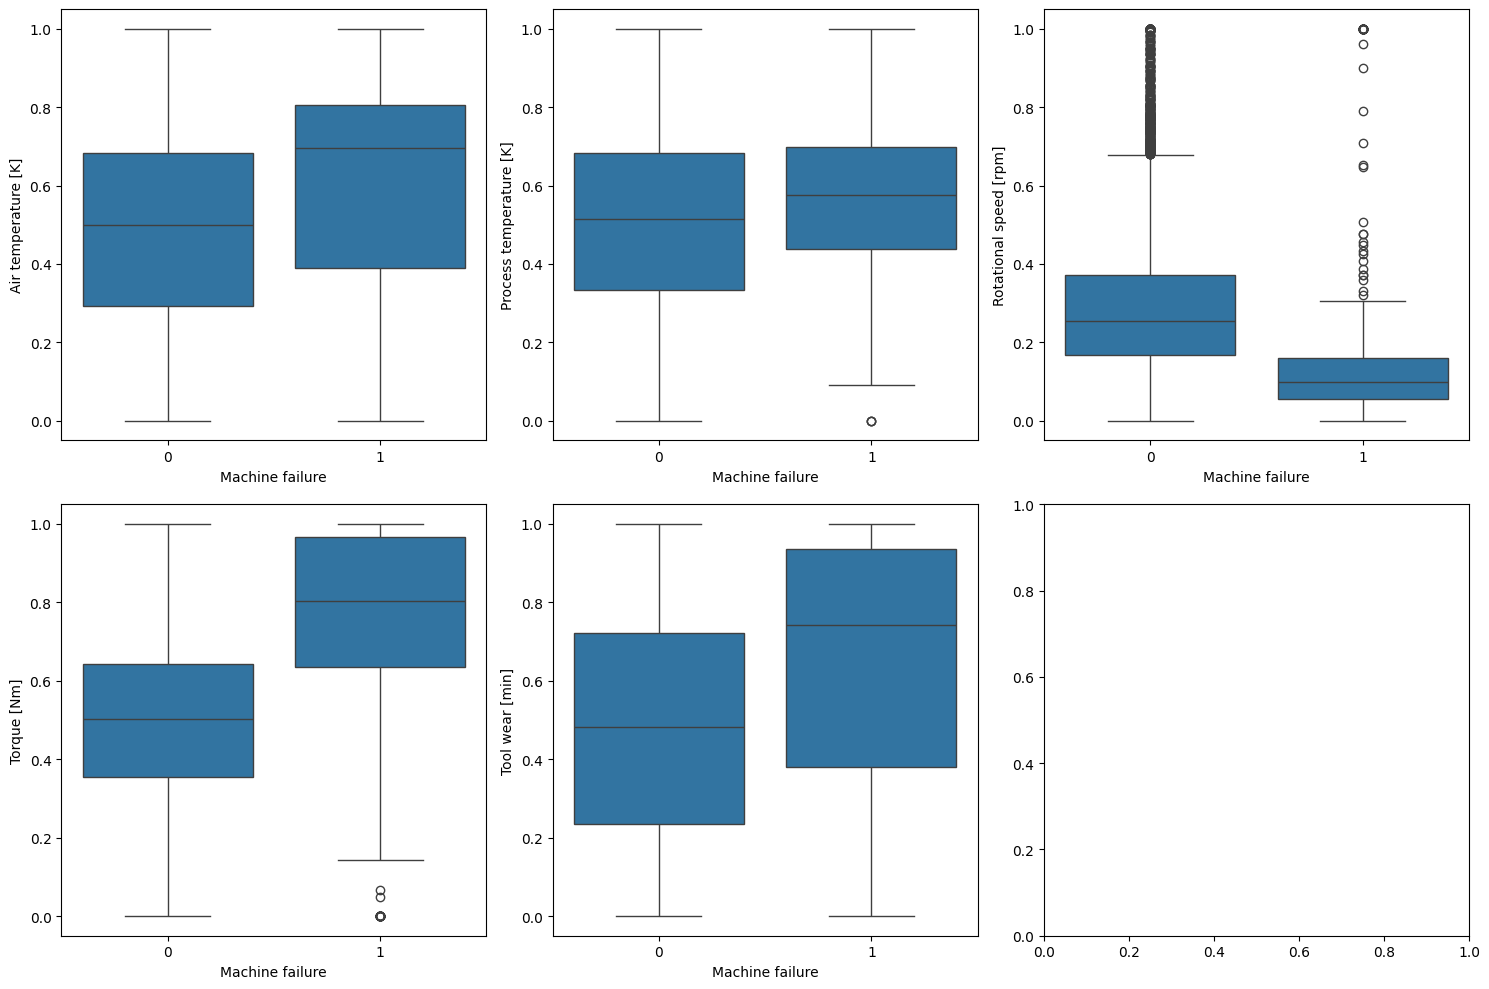

In [33]:
# Boxplots: Features vs Failure
fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.boxplot(x='Machine failure', y='Air temperature [K]', data=df, ax=axes[0,0])
sns.boxplot(x='Machine failure', y='Process temperature [K]', data=df, ax=axes[0,1])
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df, ax=axes[0,2])
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=df, ax=axes[1,0])
sns.boxplot(x='Machine failure', y='Tool wear [min]', data=df, ax=axes[1,1])
plt.tight_layout()
plt.savefig('docs/failure_boxplots.png')
plt.show()

#**Baseline Modeling**
We use Binary Classification by labeling (0/1) on 'Machine failure' by using RandomForest method which is a robust baseline and can handle class imbalance.

In [38]:
# Features and target
features = ['Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
X = df[features]
y = df['Machine failure']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train baseline model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # Default params
model.fit(X_train, y_train)

# Predict and evaluate with the test dataset
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)
print(f'Accuracy: {acc:.4f}')  # Expect ~0.9735 or higher
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))  # For report: Low false negatives?

Accuracy: 0.9780
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1939
           1       0.71      0.48      0.57        61

    accuracy                           0.98      2000
   macro avg       0.85      0.73      0.78      2000
weighted avg       0.98      0.98      0.98      2000

[[1927   12]
 [  32   29]]


In [42]:
joblib.dump(model, 'models/failure_model.pkl')

['models/failure_model.pkl']

In [113]:
# We test the model for 60 samples from the processed_data.csv file
with warnings.catch_warnings():
  warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
  for i in range(0, 501):
    sample = X_test.iloc[i].values.reshape(1, -1)
    pred = model.predict(sample)
    print(f'Sample {i} prediction: {"Failure" if pred[0] else "No Failure"}')  # Prints "Failure" or "No Failure" based on the prediction function pred

Sample 0 prediction: No Failure
Sample 1 prediction: No Failure
Sample 2 prediction: No Failure
Sample 3 prediction: No Failure
Sample 4 prediction: No Failure
Sample 5 prediction: No Failure
Sample 6 prediction: No Failure
Sample 7 prediction: No Failure
Sample 8 prediction: No Failure
Sample 9 prediction: No Failure
Sample 10 prediction: No Failure
Sample 11 prediction: No Failure
Sample 12 prediction: No Failure
Sample 13 prediction: No Failure
Sample 14 prediction: No Failure
Sample 15 prediction: No Failure
Sample 16 prediction: No Failure
Sample 17 prediction: No Failure
Sample 18 prediction: No Failure
Sample 19 prediction: No Failure
Sample 20 prediction: No Failure
Sample 21 prediction: No Failure
Sample 22 prediction: No Failure
Sample 23 prediction: No Failure
Sample 24 prediction: No Failure
Sample 25 prediction: No Failure
Sample 26 prediction: No Failure
Sample 27 prediction: No Failure
Sample 28 prediction: No Failure
Sample 29 prediction: No Failure
Sample 30 prediction

In [114]:
import warnings

# Collect samples where pred[0] == 1 (Failure)
failure_samples = []
with warnings.catch_warnings():
  warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')
  for i in range(0, 501):
    sample = X_test.iloc[i].values.reshape(1, -1)
    pred = model.predict(sample)
    if pred[0] == 1:
      failure_samples.append(i)

print(f'Failure Samples: {failure_samples}')

Failure Samples: [42, 95, 105, 124, 127, 155, 201, 202, 217, 326, 342, 429]
